# A temperature-forecasting example

 predicting the temperature 24 hours in the future, given a timeseries of hourly measurements of quantities such as atmospheric pressure and humidity, recorded over the
recent past by a set of sensors on the roof of a building

t densely connected networks and convolutional networks aren’t well-equipped
to deal with this kind of dataset, while a different kind of machine learning technique—recurrent neural networks (RNNs)—really shines on this type of problem

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2023-12-25 10:18:52--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.161.152, 52.217.168.152, 52.216.221.216, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.161.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  37.2MB/s    in 0.3s    

2023-12-25 10:18:52 (37.2 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
 data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


This outputs a count of 420,551 lines of data (each line is a timestep: a record of a
date and 14 weather-related values)

Now, convert all 420,551 lines of data into NumPy arrays: one array for the temperature (in degrees Celsius), and another one for the rest of the data—the features we
will use to predict future temperatures. Note that we discard the “Date Time” column.

In [ ]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  print(f"{i}:{line}")
  values = [float(x) for x in line.split(",")[1:]]
  temperature[i] = values[1] # We store column 1 in the “temperature” array.
  raw_data[i, :] = values[:] # We store all columns (including the temperature) in the “raw_data” array.

Streaming output truncated to the last 5000 lines.
19179:14.05.2009 04:40:00,987.24,7.94,282.13,3.47,73.30,10.69,7.84,2.86,4.95,7.94,1219.79,0.18,0.63,110.60
19180:14.05.2009 04:50:00,987.16,7.92,282.12,3.51,73.60,10.68,7.86,2.82,4.97,7.96,1219.77,0.63,1.00,31.18
19181:14.05.2009 05:00:00,987.21,7.88,282.08,3.53,73.90,10.65,7.87,2.78,4.97,7.97,1220.00,0.86,1.25,351.70
19182:14.05.2009 05:10:00,987.19,7.88,282.08,3.64,74.50,10.65,7.93,2.72,5.01,8.04,1219.94,0.50,1.25,15.43
19183:14.05.2009 05:20:00,987.23,7.63,281.82,4.02,77.80,10.47,8.15,2.32,5.15,8.25,1220.98,0.10,0.38,30.87
19184:14.05.2009 05:30:00,987.31,7.85,282.04,4.17,77.50,10.63,8.24,2.39,5.21,8.34,1220.08,0.24,0.63,156.20
19185:14.05.2009 05:40:00,987.36,8.19,282.38,4.17,75.70,10.88,8.23,2.64,5.20,8.34,1218.67,0.23,0.63,82.40
19186:14.05.2009 05:50:00,987.43,8.29,282.47,4.04,74.50,10.95,8.16,2.79,5.16,8.26,1218.36,0.18,0.63,48.41
19187:14.05.2009 06:00:00,987.36,8.11,282.30,4.15,76.00,10.82,8.22,2.60,5.20,8.33,1219.02,0.66,1.1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
101133:03.12.2010 08:00:00,983.28,-15.17,259.24,-16.84,86.90,1.87,1.63,0.25,1.03,1.65,1326.88,0.50,0.88,168.30
101134:03.12.2010 08:10:00,983.35,-15.45,258.95,-17.01,87.70,1.83,1.60,0.22,1.01,1.63,1328.43,0.63,0.90,170.40
101135:03.12.2010 08:20:00,983.28,-15.62,258.78,-17.08,88.40,1.80,1.59,0.21,1.01,1.62,1329.22,0.60,0.88,201.90
101136:03.12.2010 08:30:00,983.36,-15.51,258.89,-17.04,87.90,1.82,1.60,0.22,1.01,1.63,1328.76,0.65,1.32,161.40
101137:03.12.2010 08:40:00,983.56,-15.89,258.49,-17.35,88.40,1.76,1.56,0.20,0.99,1.58,1331.01,1.19,2.12,145.10
101138:03.12.2010 08:50:00,983.58,-15.32,259.06,-16.69,89.10,1.85,1.65,0.20,1.04,1.67,1328.05,0.40,0.80,158.30
101139:03.12.2010 09:00:00,983.68,-15.35,259.03,-16.94,87.50,1.84,1.61,0.23,1.02,1.64,1328.36,0.60,1.08,180.00
101140:03.12.2010 09:10:00,983.71,-15.39,258.98,-16.91,88.00,1.84,1.62,0.22,1.02,1.64,1328.60,1.05,1.60,168.50
101141:03.12.2010 09:20:00,983.81,-15.04,259.33,-16.59,87.80,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
126465:28.05.2011 06:00:00,991.89,6.61,280.42,4.93,89.00,9.76,8.69,1.07,5.47,8.76,1230.98,0.74,1.08,206.60
126466:28.05.2011 06:10:00,991.95,6.97,280.78,5.02,87.40,10.00,8.74,1.26,5.50,8.82,1229.46,0.65,1.04,182.60
126467:28.05.2011 06:20:00,992.06,7.03,280.83,4.97,86.70,10.05,8.71,1.34,5.48,8.78,1229.33,0.86,1.30,184.30
126468:28.05.2011 06:30:00,992.14,7.19,280.98,5.08,86.40,10.16,8.78,1.38,5.52,8.85,1228.70,0.66,1.08,147.90
126469:28.05.2011 06:40:00,992.09,7.44,281.24,5.19,85.60,10.33,8.85,1.49,5.57,8.92,1227.51,0.84,1.48,147.30
126470:28.05.2011 06:50:00,992.09,8.04,281.84,5.44,83.60,10.77,9.00,1.77,5.66,9.07,1224.82,0.99,1.72,171.00
126471:28.05.2011 07:00:00,992.09,8.94,282.74,5.70,80.10,11.45,9.17,2.28,5.77,9.24,1220.84,1.23,1.82,155.50
126472:28.05.2011 07:10:00,991.97,9.76,283.57,5.88,76.70,12.10,9.28,2.82,5.84,9.35,1217.10,1.15,1.72,149.90
126473:28.05.2011 07:20:00,992.05,10.49,284.30,6.14,74.40,12.70,9.45,3.25,5.95,9.53,12

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
159482:12.01.2012 12:50:00,992.43,7.01,280.78,3.74,79.60,10.03,7.99,2.05,5.02,8.05,1230.22,5.00,7.33,212.00
159483:12.01.2012 13:00:00,992.14,7.17,280.96,3.73,78.70,10.15,7.98,2.16,5.02,8.05,1229.16,4.21,6.73,205.20
159484:12.01.2012 13:10:00,991.80,7.71,281.53,3.82,76.30,10.53,8.03,2.50,5.05,8.10,1226.35,5.78,8.33,212.70
159485:12.01.2012 13:20:00,991.54,7.91,281.75,3.71,74.70,10.67,7.97,2.70,5.02,8.04,1225.19,6.43,10.37,216.70
159486:12.01.2012 13:30:00,991.44,7.68,281.53,3.60,75.30,10.51,7.91,2.60,4.98,7.98,1226.10,5.67,9.41,209.50
159487:12.01.2012 13:40:00,991.11,7.44,281.32,3.59,76.50,10.33,7.91,2.43,4.98,7.98,1226.74,4.81,7.97,204.70
159488:12.01.2012 13:50:00,990.73,7.62,281.53,3.71,76.20,10.46,7.97,2.49,5.02,8.05,1225.45,4.53,8.69,200.90
159489:12.01.2012 14:00:00,990.59,7.96,281.88,3.70,74.40,10.71,7.97,2.74,5.02,8.04,1223.80,6.21,8.45,210.00
159490:12.01.2012 14:10:00,990.44,8.00,281.93,3.63,73.80,10.74,7.92,2.81,4.99,8.00,1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
181252:11.06.2012 17:10:00,976.59,18.04,293.18,9.40,56.97,20.72,11.81,8.92,7.55,12.09,1162.95,1.35,2.96,161.10
181253:11.06.2012 17:20:00,976.61,18.00,293.14,9.48,57.44,20.67,11.87,8.80,7.60,12.16,1163.10,1.88,2.88,83.50
181254:11.06.2012 17:30:00,976.61,17.85,292.99,9.49,58.00,20.48,11.88,8.60,7.60,12.16,1163.70,1.74,2.50,89.60
181255:11.06.2012 17:40:00,976.60,17.97,293.11,9.41,57.26,20.63,11.81,8.82,7.56,12.10,1163.24,2.04,4.16,127.00
181256:11.06.2012 17:50:00,976.60,18.02,293.16,9.61,57.86,20.70,11.98,8.72,7.66,12.26,1162.96,2.16,3.04,125.20
181257:11.06.2012 18:00:00,976.57,17.92,293.06,10.06,60.01,20.57,12.34,8.23,7.90,12.64,1163.16,1.53,3.16,101.40
181258:11.06.2012 18:10:00,976.56,17.66,292.80,10.77,63.96,20.23,12.94,7.29,8.28,13.25,1163.92,1.91,2.96,76.90
181259:11.06.2012 18:20:00,976.47,17.60,292.75,10.88,64.70,20.16,13.04,7.12,8.35,13.36,1164.00,1.71,2.78,76.60
181260:11.06.2012 18:30:00,976.46,17.42,292.57,10.71,64.70,19.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
210729:02.01.2013 10:00:00,993.13,4.07,277.77,0.47,77.30,8.18,6.32,1.86,3.97,6.36,1244.95,5.07,6.69,211.10
210730:02.01.2013 10:10:00,993.22,4.08,277.78,0.52,77.50,8.18,6.34,1.84,3.98,6.39,1244.99,4.83,6.61,209.50
210731:02.01.2013 10:20:00,993.28,4.18,277.88,0.53,77.00,8.24,6.35,1.90,3.98,6.39,1244.61,4.83,7.09,204.00
210732:02.01.2013 10:30:00,993.50,4.30,277.98,0.59,76.70,8.31,6.37,1.94,4.00,6.42,1244.36,3.97,6.53,200.20
210733:02.01.2013 10:40:00,993.62,4.42,278.09,0.59,76.10,8.38,6.38,2.00,4.00,6.42,1243.97,4.06,6.73,204.40
210734:02.01.2013 10:50:00,993.67,4.64,278.31,0.53,74.60,8.51,6.35,2.16,3.98,6.39,1243.05,4.88,6.89,209.30
210735:02.01.2013 11:00:00,993.85,4.72,278.37,0.54,74.20,8.56,6.35,2.21,3.98,6.39,1242.91,4.36,7.21,211.80
210736:02.01.2013 11:10:00,994.01,4.78,278.42,0.63,74.40,8.60,6.40,2.20,4.01,6.43,1242.82,1.48,3.30,218.00
210737:02.01.2013 11:20:00,994.08,4.81,278.44,0.62,74.20,8.61,6.39,2.22,4.01,6.43,1242.78,1.6

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
228173:03.05.2013 13:20:00,990.23,13.78,287.75,6.91,63.16,15.78,9.97,5.81,6.28,10.07,1197.62,4.24,5.84,45.06
228174:03.05.2013 13:30:00,990.20,14.05,288.02,7.05,62.64,16.06,10.06,6.00,6.34,10.16,1196.41,3.43,6.65,67.79
228175:03.05.2013 13:40:00,990.24,14.29,288.26,7.03,61.61,16.31,10.05,6.26,6.34,10.15,1195.47,3.64,6.38,87.10
228176:03.05.2013 13:50:00,990.23,14.59,288.56,7.41,62.01,16.63,10.31,6.32,6.50,10.42,1194.09,3.73,5.28,54.66
228177:03.05.2013 14:00:00,990.23,14.45,288.42,7.31,62.13,16.48,10.24,6.24,6.46,10.34,1194.70,3.91,5.84,39.76
228178:03.05.2013 14:10:00,990.13,14.39,288.37,7.12,61.56,16.42,10.11,6.31,6.37,10.21,1194.89,3.55,5.84,52.83
228179:03.05.2013 14:20:00,989.99,14.42,288.41,7.09,61.34,16.45,10.09,6.36,6.36,10.19,1194.61,3.79,7.40,65.18
228180:03.05.2013 14:30:00,989.86,14.62,288.62,6.94,59.93,16.66,9.99,6.68,6.30,10.09,1193.67,4.25,6.16,81.40
228181:03.05.2013 14:40:00,989.75,14.74,288.75,7.11,60.18,16.79,10.11,6

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
261697:22.12.2013 08:50:00,992.76,8.83,282.58,4.39,73.60,11.36,8.36,3.00,5.26,8.42,1222.52,5.35,8.41,203.80
261698:22.12.2013 09:00:00,992.68,8.87,282.62,4.45,73.70,11.39,8.40,3.00,5.28,8.46,1222.23,6.12,8.73,201.80
261699:22.12.2013 09:10:00,992.56,8.93,282.69,4.46,73.50,11.44,8.41,3.03,5.29,8.47,1221.81,5.33,8.53,200.40
261700:22.12.2013 09:20:00,992.49,8.99,282.76,4.52,73.50,11.49,8.44,3.04,5.31,8.51,1221.45,6.83,10.77,205.10
261701:22.12.2013 09:30:00,992.49,9.07,282.84,4.58,73.40,11.55,8.48,3.07,5.33,8.54,1221.09,8.00,11.53,207.90
261702:22.12.2013 09:40:00,992.66,9.07,282.83,4.64,73.70,11.55,8.51,3.04,5.35,8.57,1221.28,6.67,9.49,209.70
261703:22.12.2013 09:50:00,992.65,9.06,282.82,4.72,74.20,11.54,8.56,2.98,5.38,8.63,1221.29,6.06,9.25,211.10
261704:22.12.2013 10:00:00,992.65,9.12,282.88,4.78,74.20,11.59,8.60,2.99,5.40,8.66,1221.01,7.45,10.31,212.80
261705:22.12.2013 10:10:00,992.89,9.19,282.93,4.77,73.80,11.64,8.59,3.05,5.40,8.65

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
295267:11.08.2014 05:30:00,984.07,18.03,292.53,14.55,80.10,20.71,16.59,4.12,10.55,16.86,1169.77,2.05,2.80,247.20
295268:11.08.2014 05:40:00,984.20,17.86,292.35,14.48,80.60,20.49,16.52,3.98,10.50,16.78,1170.65,1.96,2.54,246.10
295269:11.08.2014 05:50:00,984.29,17.67,292.15,14.47,81.50,20.25,16.50,3.75,10.49,16.76,1171.52,2.20,2.84,248.10
295270:11.08.2014 06:00:00,984.41,17.44,291.91,14.36,82.10,19.95,16.38,3.57,10.42,16.64,1172.65,2.74,3.40,249.30
295271:11.08.2014 06:10:00,984.52,17.23,291.69,14.41,83.50,19.69,16.44,3.25,10.45,16.70,1173.60,1.05,1.72,254.80
295272:11.08.2014 06:20:00,984.63,17.21,291.66,14.36,83.30,19.67,16.38,3.28,10.41,16.64,1173.84,0.83,1.48,267.80
295273:11.08.2014 06:30:00,984.70,17.58,292.02,14.21,80.60,20.13,16.23,3.91,10.31,16.48,1172.50,1.14,1.72,260.80
295274:11.08.2014 06:40:00,984.75,18.36,292.80,14.18,76.60,21.14,16.20,4.95,10.29,16.45,1169.44,0.78,1.64,299.00
295275:11.08.2014 06:50:00,984.86,19.12,293.5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
348027:13.08.2015 23:20:00,985.87,25.73,300.11,17.82,61.67,33.13,20.43,12.70,12.99,20.73,1140.04,2.55,3.72,351.00
348028:13.08.2015 23:30:00,985.77,25.61,300.00,17.76,61.89,32.90,20.36,12.54,12.95,20.65,1140.41,3.02,3.84,10.58
348029:13.08.2015 23:40:00,985.66,25.50,299.90,17.71,62.09,32.68,20.29,12.39,12.91,20.59,1140.74,2.78,4.04,16.06
348030:13.08.2015 23:50:00,985.63,25.38,299.78,17.66,62.35,32.45,20.23,12.22,12.87,20.53,1141.19,3.18,4.88,22.93
348031:14.08.2015 00:00:00,985.56,25.35,299.75,17.61,62.25,32.39,20.17,12.23,12.83,20.46,1141.25,3.33,4.92,20.06
348032:14.08.2015 00:10:00,985.42,25.22,299.64,17.58,62.64,32.15,20.14,12.01,12.81,20.43,1141.60,2.90,3.84,27.52
348033:14.08.2015 00:20:00,985.31,25.13,299.56,17.55,62.84,31.97,20.09,11.88,12.78,20.39,1141.83,3.37,4.64,30.12
348034:14.08.2015 00:30:00,985.24,25.06,299.49,17.51,62.96,31.84,20.05,11.79,12.75,20.35,1142.04,3.94,4.92,30.07
348035:14.08.2015 00:40:00,985.13,24.92,299.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
406299:21.09.2016 15:20:00,993.22,16.90,290.63,9.82,62.97,19.28,12.14,7.14,7.64,12.23,1187.34,0.41,1.20,55.80
406300:21.09.2016 15:30:00,993.07,17.72,291.46,9.83,59.86,20.31,12.16,8.15,7.65,12.24,1183.81,0.67,1.28,224.80
406301:21.09.2016 15:40:00,993.02,18.25,291.99,9.84,57.92,21.00,12.16,8.84,7.65,12.25,1181.58,0.48,1.28,351.80
406302:21.09.2016 15:50:00,992.94,18.49,292.24,9.73,56.62,21.32,12.07,9.25,7.60,12.16,1180.56,0.64,1.32,32.24
406303:21.09.2016 16:00:00,992.83,18.87,292.63,9.67,55.09,21.83,12.03,9.80,7.57,12.11,1178.92,1.04,1.80,202.30
406304:21.09.2016 16:10:00,992.83,18.38,292.14,9.77,57.16,21.17,12.10,9.07,7.62,12.19,1180.86,0.56,1.16,286.70
406305:21.09.2016 16:20:00,992.82,17.76,291.52,9.29,57.56,20.36,11.72,8.64,7.38,11.81,1183.54,1.18,1.64,20.63
406306:21.09.2016 16:30:00,992.78,17.54,291.30,9.38,58.70,20.08,11.79,8.29,7.42,11.87,1184.36,1.02,2.02,343.80
406307:21.09.2016 16:40:00,992.74,17.78,291.55,9.67,58.97,20.39,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




418874:21.12.2016 01:20:00,998.19,-2.94,270.36,-5.03,85.40,4.91,4.20,0.72,2.62,4.20,1284.81,0.96,1.74,204.80
418875:21.12.2016 01:30:00,998.18,-2.98,270.32,-5.18,84.70,4.90,4.15,0.75,2.59,4.16,1285.02,0.79,1.76,191.60
418876:21.12.2016 01:40:00,998.11,-3.17,270.14,-5.24,85.50,4.83,4.13,0.70,2.58,4.14,1285.81,1.17,1.56,204.50
418877:21.12.2016 01:50:00,998.08,-3.19,270.12,-5.20,85.90,4.82,4.14,0.68,2.59,4.15,1285.87,1.28,1.82,210.20
418878:21.12.2016 02:00:00,998.01,-3.24,270.08,-5.29,85.60,4.81,4.11,0.69,2.57,4.12,1286.03,1.40,2.00,206.10
418879:21.12.2016 02:10:00,998.12,-3.97,269.33,-5.77,87.20,4.55,3.97,0.58,2.48,3.97,1289.74,0.73,1.28,166.50
418880:21.12.2016 02:20:00,998.11,-4.18,269.13,-5.61,89.70,4.48,4.02,0.46,2.51,4.02,1290.71,0.44,1.52,276.20
418881:21.12.2016 02:30:00,998.09,-3.78,269.53,-5.19,89.80,4.62,4.15,0.47,2.59,4.15,1288.68,0.45,0.80,255.10
418882:21.12.2016 02:40:00,998.10,-3.36,269.95,-5.04,88.10,4.76,4.20,0.57,2.62,4.20,1286.68,0.25,0.56,85.00
418883:21.12.2016 0

In [ ]:
temperature

array([-8.02, -8.41, -8.51, ..., -3.16, -4.23, -4.82])

In [ ]:
raw_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

shows the plot of temperature (in degrees Celsius) over time. On this plot,
you can clearly see the yearly periodicity of temperature—the data spans 8 years.


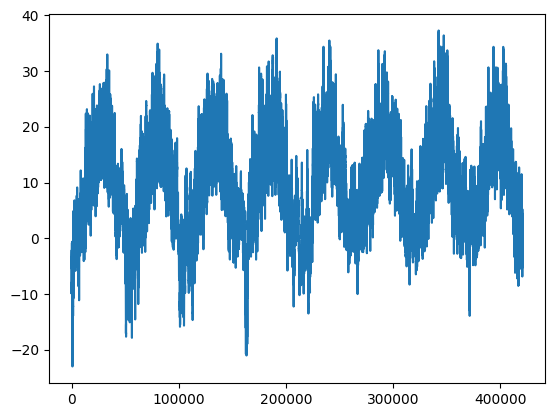

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

shows a more narrow plot of the first 10 days of temperature data. Because
the data is recorded every 10 minutes, you get 24 × 6 = 144 data points per day.

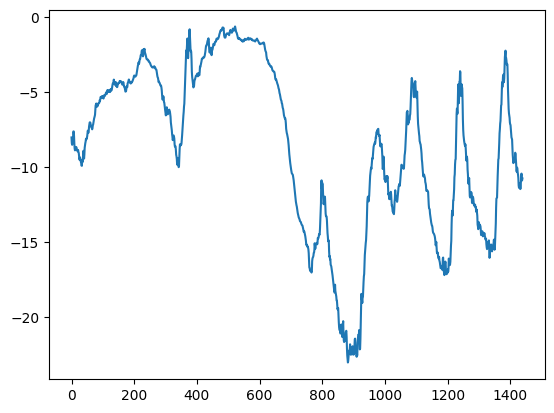

In [ ]:
plt.plot(range(1440), temperature[:1440])

[What does periodicity means](https://chat.openai.com/share/3088cf6d-f9d7-493e-b977-6aa1f93a4ad6)

With our dataset, if you were trying to predict average temperature for the next month
given a few months of past data, the problem would be easy, due to the reliable yearscale periodicity of the data. But looking at the data over a scale of days, the temperature
looks a lot more chaotic. Is this timeseries predictable at a daily scale? Let’s find out.

 In all our experiments, we’ll use the first 50% of the data for training, the following 25% for validation, and the last 25% for testing.


  When working with timeseries
data, it’s important to use validation and test data that is more recent than the training data, because you’re trying to predict the future given the past, not the reverse,
and your validation/test splits should reflect that. Some problems happen to be considerably simpler if you reverse the time axis!

In [ ]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)


num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


The exact formulation of the problem will be as follows: given data covering the previous five days and sampled once per hour, can we predict the temperature in 24 hours?

 First, let’s preprocess the data to a format a neural network can ingest. This is
easy: the data is already numerical, so you don’t need to do any vectorization.

 But
each timeseries in the data is on a different scale (for example, atmospheric pressure, measured in mbar, is around 1,000, while H2OC, measured in millimoles per
mole, is around 3). We’ll normalize each timeseries independently so that they all
take small values on a similar scale.

We’re going to use the first 210,225 timesteps as
training data, so we’ll compute the mean and standard deviation only on this fraction of the data.

In [ ]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

Next, let’s create a Dataset object that yields batches of data from the past five days
along with a target temperature 24 hours in the future

Because the samples in the
dataset are highly redundant (sample N and sample N + 1 will have most of their timesteps in common), it would be wasteful to explicitly allocate memory for every sample.
Instead, we’ll generate the samples on the fly while only keeping in memory the original raw_data and temperature arrays, and nothing more.

We could easily write a Python generator to do this, but there’s a built-in dataset
utility in Keras that does just that (timeseries_dataset_from_array()), so we can
save ourselves some work by using it. You can generally use it for any kind of timeseries
forecasting task.

Understanding timeseries_dataset_from_array()


To understand what timeseries_dataset_from_array() does, let’s look at a simple example.

 The general idea is that you provide an array of timeseries data (the
data argument), and timeseries_dataset_from_array() gives you windows
extracted from the original timeseries (we’ll call them “sequences”).

For example, if you use data = [0 1 2 3 4 5 6] and sequence_length=3, then
timeseries_dataset_from_array() will generate the following samples: [0 1 2],
[1 2 3], [2 3 4], [3 4 5], [4 5 6].

You can also pass a targets argument (an array) to timeseries_dataset_
from_array(). The first entry of the targets array should match the desired target for the first sequence that will be generated from the data array. So if you’re
doing timeseries forecasting, targets should be the same array as data, offset
by some amount.


For instance, with data = [0 1 2 3 4 5 6 …] and sequence_length=3, you could create
a dataset to predict the next step in the series by passing targets = [3 4 5 6 …]. Let’s
try it:

In [ ]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
 data=int_sequence[:-3],
 targets=int_sequence[3:], # The target for the sequence that starts at data[N] will be data[N + 3].
 sequence_length=3,
 batch_size=2,
)

In [ ]:
for inputs, targets in dummy_dataset:
 for i in range(inputs.shape[0]):
    print([int(x) for x in inputs[i]], int(targets[i]))


[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


We’ll use timeseries_dataset_from_array() to instantiate three datasets: one for
training, one for validation, and one for testing.
 We’ll use the following parameter values:

 sampling_rate = 6—Observations will be sampled at one data point per hour:
we will only keep one data point out of 6.

 sequence_length = 120—Observations will go back 5 days (120 hours).

 delay = sampling_rate * (sequence_length + 24 - 1)—The target for a sequence
will be the temperature 24 hours after the end of the sequence.

In [ ]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

In [ ]:
delay

858

When making the training dataset, we’ll pass start_index = 0 and end_index =
num_train_samples to only use the first 50% of the data.

For the validation dataset,
we’ll pass start_index = num_train_samples and end_index = num_train_samples +
num_val_samples to use the next 25% of the data.

Finally, for the test dataset, we’ll pass
start_index = num_train_samples + num_val_samples to use the remaining samples.

In [ ]:
train_dataset = keras.utils.timeseries_dataset_from_array(
 raw_data[:-delay],
 targets=temperature[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=0,
 end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
 raw_data[:-delay],
 targets=temperature[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=num_train_samples,
 end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
 raw_data[:-delay],
 targets=temperature[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=num_train_samples + num_val_samples)

Each dataset yields a tuple (samples, targets), where samples is a batch of 256 samples, each containing 120 consecutive hours of input data, and targets is the corresponding array of 256 target temperatures. Note that the samples are randomly
shuffled, so two consecutive sequences in a batch (like samples[0] and samples[1])
aren’t necessarily temporally close.

In [ ]:
for samples, targets in train_dataset:
    print("samples shape:", samples.shape)
    print("targets shape:", targets.shape)
    break


samples shape: (256, 120, 14)
targets shape: (256,)


# A common-sense, non-machine learning baseline

Before we start using black-box deep learning models to solve the temperatureprediction problem, let’s try a simple, common-sense approach. It will serve as a sanity
check, and it will establish a baseline that we’ll have to beat in order to demonstrate
the usefulness of more-advanced machine learning models. Such common-sense baselines can be useful when you’re approaching a new problem for which there is no
known solution (yet). A classic example is that of unbalanced classification tasks,
where some classes are much more common than others. If your dataset contains 90%
instances of class A and 10% instances of class B, then a common-sense approach to
the classification task is to always predict “A” when presented with a new sample. Such
a classifier is 90% accurate overall, and any learning-based approach should therefore
beat this 90% score in order to demonstrate usefulness. Sometimes, such elementary
baselines can prove surprisingly hard to beat.

In this case, the temperature timeseries can safely be assumed to be continuous
(the temperatures tomorrow are likely to be close to the temperatures today) as
well as periodical with a daily period. Thus a common-sense approach is to always
predict that the temperature 24 hours from now will be equal to the temperature
right now.

 Let’s evaluate this approach, using the mean absolute error (MAE) metric, defined as follows:
np.mean(np.abs(preds - targets))

In [ ]:
def evaluate_naive_method(dataset):
 total_abs_err = 0.
 samples_seen = 0
 for samples, targets in dataset:
    # The temperature feature is at column 1, so samples[:, -1, 1] is the last temperature measurement in the input sequence. Recall that we normalized our features, so to retrieve a temperature in degrees Celsius,
       # we need to un-normalize it by multiplying it by the standard deviation and adding back the mean.
    preds = samples[:, -1, 1] * std[1] + mean[1]
    total_abs_err += np.sum(np.abs(preds - targets))
    samples_seen += samples.shape[0]
 return total_abs_err / samples_seen
print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")

Validation MAE: 2.44
Test MAE: 2.62


This common-sense baseline achieves a validation MAE of 2.44 degrees Celsius and a
test MAE of 2.62 degrees Celsius. So if you always assume that the temperature 24
hours in the future will be the same as it is now, you will be off by two and a half
degrees on average. It’s not too bad, but you probably won’t launch a weather forecasting service based on this heuristic.

 Now the game is to use your knowledge of deep
learning to do better.

# Basic Machine Learning model

In the same way that it’s useful to establish a common-sense baseline before trying
machine learning approaches, it’s useful to try simple, cheap machine learning models (such as small, densely connected networks) before looking into complicated and
computationally expensive models such as RNNs. This is the best way to make sure any
further complexity you throw at the problem is legitimate and delivers real benefits.

 The following listing shows a fully connected model that starts by flattening the
data and then runs it through two Dense layers.


**Note the lack of an activation function**
**on the last Dense layer, which is typical for a regression problem.**

We use mean
squared error (MSE) as the loss, rather than MAE, because unlike MAE, it’s smooth
around zero, which is a useful property for gradient descent. We will monitor MAE by
adding it as a metric in compile().

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


callbacks = [
 keras.callbacks.ModelCheckpoint("jena_dense.keras",
 save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])


history = model.fit(train_dataset,
 epochs=10,
 validation_data=val_dataset,
 callbacks=callbacks)

In [ ]:
model = keras.models.load_model("jena_dense.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 11s 27ms/step - loss: 10.9721 - mae: 2.5913
Test MAE: 2.59


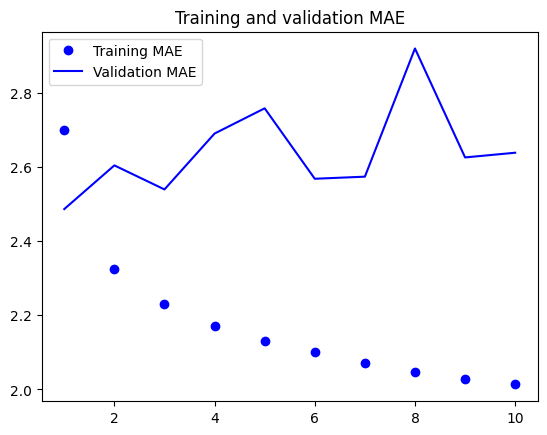

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

Some of the validation losses are close to the no-learning baseline, but not reliably.
This goes to show the merit of having this baseline in the first place: it turns out to be
not easy to outperform.


**Your common sense contains a lot of valuable information to**
**which a machine learning model doesn’t have access**

# Let’s try a 1D convolutional model

You already know about the Conv2D and SeparableConv2D layers, which see their
inputs through small windows that swipe across 2D grids.

There are also 1D and even 3D versions of these layers: Conv1D, SeparableConv1D, and Conv3D. The Conv1D layer
relies on 1D windows that slide across input sequences, and the Conv3D layer relies on
cubic windows that slide across input volumes.


You can thus build 1D convnets, strictly analogous to 2D convnets. They’re a great
fit for any sequence data that follows the translation invariance assumption (meaning
that if you slide a window over the sequence, the content of the window should follow
the same properties independently of the location of the window).

 Let’s try one on our temperature-forecasting problem. We’ll pick an initial window
length of 24, so that we look at 24 hours of data at a time (one cycle). As we downsample the sequences (via MaxPooling1D layers), we’ll reduce the window size accordingly

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint("jena_conv.keras",
 save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
 epochs=10,
 validation_data=val_dataset,
 callbacks=callbacks)
model = keras.models.load_model("jena_conv.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Epoch 1/10
819/819 [==============================] - 44s 50ms/step - loss: 23.3080 - mae: 3.7542 - val_loss: 17.0069 - val_mae: 3.2366
Epoch 2/10
819/819 [==============================] - 46s 56ms/step - loss: 14.9415 - mae: 3.0577 - val_loss: 15.0274 - val_mae: 3.0548
Epoch 3/10
819/819 [==============================] - 47s 58ms/step - loss: 13.4422 - mae: 2.9032 - val_loss: 14.5320 - val_mae: 2.9925
Epoch 4/10
819/819 [==============================] - 45s 55ms/step - loss: 12.4953 - mae: 2.8014 - val_loss: 15.0826 - val_mae: 3.0366
Epoch 5/10
819/819 [==============================] - 45s 55ms/step - loss: 11.8692 - mae: 2.7296 - val_loss: 15.2593 - val_mae: 3.0626
Epoch 6/10
819/819 [==============================] - 45s 55ms/step - loss: 11.4492 - mae: 2.6804 - val_loss: 16.2519 - val_mae: 3.1819
Epoch 7/10
819/819 [==============================] - 37s 44ms/step - loss: 11.1149 - mae: 2.6405 - val_loss: 15.0503 - val_mae: 3.0479
Epoch 8/10
819/819 [============================

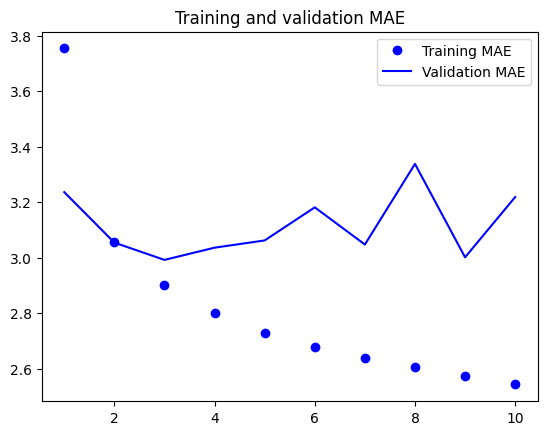

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

As it turns out, this model performs even worse than the densely connected one,
only achieving a validation MAE of about 2.9 degrees, far from the common-sense
baseline. What went wrong here?

Two things:

 First, weather data doesn’t quite respect the translation invariance assumption.
While the data does feature daily cycles, data from a morning follows different
properties than data from an evening or from the middle of the night. Weather
data is only translation-invariant for a very specific timescale.

 Second, order in our data matters—a lot. The recent past is far more informative for predicting the next day’s temperature than data from five days ago. A
1D convnet is not able to leverage this fact. In particular, our max pooling and
global average pooling layers are largely destroying order information.

# Recurrent Neural Networks

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
callbacks = [
 keras.callbacks.ModelCheckpoint("jena_lstm.keras",
 save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
 epochs=10,
 validation_data=val_dataset,
 callbacks=callbacks)

In [ ]:
model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 16s 36ms/step - loss: 10.5856 - mae: 2.5376
Test MAE: 2.54


Much better! We achieve a validation MAE as low as 2.36
degrees and a test MAE of 2.55 degrees. The LSTM-based model can finally beat the
common-sense baseline (albeit just by a bit, for now), demonstrating the value of
machine learning on this task.

[What are feed forward networks, difference betwwen them](https://chat.openai.com/share/7dce3fe0-7242-4ddd-b66b-78bc81de0e2c)

A recurrent neural network (RNN) adopts the same principle, albeit in an extremely simplified version: it processes
sequences by iterating through the sequence elements and
maintaining a state that contains information relative to what
it has seen so far. In effect, an RNN is a type of neural network that has an internal loop

The state of the RNN is reset between processing two different, independent sequences (such as two samples in a
batch), so you still consider one sequence to be a single data
point: a single input to the network. What changes is that this
data point is no longer processed in a single step; rather, the
network internally loops over sequence elements.

To make these notions of loop and state clear, let’s implement the forward pass of a
toy RNN. This RNN takes as input a sequence of vectors, which we’ll encode as a rank-2
tensor of size (timesteps, input_features). It loops over timesteps, and at each timestep, it considers its current state at t and the input at t (of shape (input_features,),
and combines them to obtain the output at t. We’ll then set the state for the next step
to be this previous output. For the first timestep, the previous output isn’t defined;
hence, there is no current state. So we’ll initialize the state as an all-zero vector called
the initial state of the network.

To make these notions absolutely unambiguous, let’s write a naive NumPy implementation of the forward pass of the simple RNN.

In [ ]:
import numpy as np
timesteps = 100 # Number of timesteps in the input sequence
input_features = 32 # Dimensionality of the input feature space
output_features = 64 # Dimensionality of the output feature space
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,)) # Initial state: an all-zero vector

# Creates random weight matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []
for input_t in inputs:
  # Combines the input with the current state (the previous output) to obtain the current output. We use tanh to add non-linearity (we could use any other activation function).
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis=0) # The final output is a rank-2 tensor of shape (timesteps, output_features).

In [ ]:
final_output_sequence

array([[0.99999999, 0.99999989, 0.99999999, ..., 0.99999994, 0.99999995,
        0.99999999],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

That’s easy enough. In summary, an RNN is a for loop that reuses quantities computed during the previous iteration of the loop, nothing more. Of course, there are
many different RNNs fitting this definition that you could build—this example is one
of the simplest RNN formulations. RNNs are characterized by their step function

NOTE:

 In this example, the final output is a rank-2 tensor of shape (timesteps, output_features), where each timestep is the output of the loop at
time t. Each timestep t in the output tensor contains information about timesteps 0 to t in the input sequence—about the entire past. For this reason, in
many cases, you don’t need this full sequence of outputs; you just need the
last output (output_t at the end of the loop), because it already contains
information about the entire sequence.

The process we just naively implemented in NumPy corresponds to an actual Keras
layer—the SimpleRNN layer.

 There is one minor difference: SimpleRNN processes batches of sequences, like all
other Keras layers, not a single sequence as in the NumPy example. This means it takes
inputs of shape (batch_size, timesteps, input_features), rather than (timesteps,
input_features). When specifying the shape argument of the initial Input(), note
that you can set the timesteps entry to None, which enables your network to process
sequences of arbitrary length.

In [ ]:
num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)

This is especially useful if your model is meant to process sequences of variable length.
However, if all of your sequences have the same length, I recommend specifying a
complete input shape, since it enables model.summary() to display output length
information, which is always nice, and it can unlock some performance optimizations

 All recurrent layers in Keras (SimpleRNN, LSTM, and GRU) can be run in two different modes:

 they can return either full sequences of successive outputs for each timestep (a rank-3 tensor of shape (batch_size, timesteps, output_features)) or


return only the last output for each input sequence (a rank-2 tensor of shape (batch_
size, output_features)). These two modes are controlled by the return_sequences
constructor argument.

[More on above thing](https://chat.openai.com/share/be55da83-7c3b-467e-b691-5fd985bb645f)

In [ ]:
num_features = 14
steps = 120

inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs) # Note that return_sequences=False is the default.

print(outputs.shape)

(None, 16)


In [ ]:

num_features = 14
steps = 120

inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)

print(outputs.shape)

(None, 120, 16)


It’s sometimes useful to stack several recurrent layers one after the other in order to
increase the representational power of a network. In such a setup, you have to get all
of the intermediate layers to return a full sequence of outputs.

In [ ]:
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)
print(outputs.shape)

(None, 16)


In practice, you’ll rarely work with the SimpleRNN layer. It’s generally too simplistic to be
of real use. In particular, SimpleRNN has a major issue: although it should theoretically
be able to retain at time t information about inputs seen many timesteps before, such
long-term dependencies prove impossible to learn in practice. This is due to the vanishing gradient problem, an effect that is similar to what is observed with non-recurrent networks (feedforward networks) that are many layers deep: as you keep adding layers to a
network, the network eventually becomes untrainable.

This layer is a variant of the SimpleRNN layer you already know about; it adds a way
to carry information across many timesteps. Imagine a conveyor belt running parallel
to the sequence you’re processing. Information from the sequence can jump onto the
conveyor belt at any point, be transported to a later timestep, and jump off, intact,
when you need it. This is essentially what LSTM does: it saves information for later,
thus preventing older signals from gradually vanishing during processing.

#  Using recurrent dropout to fight overfitting

dropout, which randomly zeros out input units of a layer in order to break happenstance correlations in the training data that the layer is exposed to

It has long been known that applying dropout before a recurrent layer hinders
learning rather than helping with regularization.

 the same dropout mask (the same pattern of dropped units)
should be applied at every timestep, instead of using a dropout mask that varies randomly from timestep to timestep.

What’s more, in order to regularize the representations formed by the recurrent gates of layers such as GRU and LSTM, a temporally
constant dropout mask should be applied to the inner recurrent activations of the
layer (a recurrent dropout mask). Using the same dropout mask at every timestep
allows the network to properly propagate its learning error through time;

a temporally random dropout mask would disrupt this error signal and be harmful to the
learning process.

[How droput mask works](https://chat.openai.com/share/5ada19cb-0746-4cfc-97d2-0634587bb457)

Every recurrent layer in Keras has two dropout-related
arguments:


 dropout, a float specifying the dropout rate for input units of the layer,
and

recurrent_dropout, specifying the dropout rate of the recurrent units.

 Because networks being regularized with dropout always take much longer to fully converge, we’ll train the model for five times as many epochs.

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x) # To regularize the Dense layer, we also add a Dropout layer after the LSTM.
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
 save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
 epochs=50,
 validation_data=val_dataset,
 callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("jena_lstm_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

# Stacking recurrent layers

Because you’re no longer overfitting but seem to have hit a performance bottleneck,
you should consider increasing the capacity and expressive power of the network.

it’s generally a good idea to
increase the capacity of your model until overfitting becomes the primary obstacle

As long as you aren’t overfitting too badly, you’re likely under capacity.

 Increasing network capacity is typically done by increasing the number of units in
the layers or adding more layers. Recurrent layer stacking is a classic way to build
more-powerful recurrent networks: for instance, not too long ago the Google Translate algorithm was powered by a stack of seven large LSTM layers—that’s huge.

 To stack recurrent layers on top of each other in Keras, all intermediate layers should
return their full sequence of outputs (a rank-3 tensor) rather than their output at the last
timestep. As you’ve already learned, this is done by specifying return_sequences=True.

 GRU
is very similar to LSTM—you can think of it as a slightly simpler, streamlined version of
the LSTM architecture.

In [ ]:
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
 save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
 epochs=50,
 validation_data=val_dataset,
 callbacks=callbacks)

Epoch 1/50
 12/819 [..............................] - ETA: 5:58 - loss: 129.1337 - mae: 9.5876

KeyboardInterrupt: ignored

In [ ]:
model = keras.models.load_model("jena_stacked_gru_dropout.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

# Using  bidirectional RNNs

A bidirectional RNN exploits this idea to improve on the performance of
chronological-order RNNs. It looks at its input sequence both ways ,
obtaining potentially richer representations and capturing patterns that may have
been missed by the chronological-order version alone.

To instantiate a bidirectional RNN in Keras, you use the **Bidirectional** layer, which
takes as its first argument a recurrent layer instance. Bidirectional creates a second,
separate instance of this recurrent layer and uses one instance for processing the
input sequences in chronological order and the other instance for processing the
input sequences in reversed order.

In [ ]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
 epochs=10,
 validation_data=val_dataset)

Epoch 1/10
 91/819 [==>...........................] - ETA: 1:36 - loss: 100.8467 - mae: 8.1685

KeyboardInterrupt: ignored

You’ll find that it doesn’t perform as well as the plain LSTM layer. It’s easy to understand why: all the predictive capacity must come from the chronological half of the
network, because the antichronological half is known to be severely underperforming
on this task (again, because the recent past matters much more than the distant past,
in this case). At the same time, the presence of the antichronological half doubles the
network’s capacity and causes it to start overfitting much earlier.